## Import Data

In [21]:
from datasets import load_dataset, Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
cfg = "summarization_samples"
split = "data"

ds = load_dataset("pminervini/HaluEval", cfg, split=split)
print(ds)
print(ds.features)

# first 3 examples
for i in range(3):
    print(f"\nSample {i}:")
    for k, v in ds[i].items():
        print(f"{k}: {v}")

Dataset({
    features: ['document', 'summary', 'hallucination'],
    num_rows: 10000
})
{'document': Value('string'), 'summary': Value('string'), 'hallucination': Value('string')}

Sample 0:
document: Marseille, France (CNN)The French prosecutor leading an investigation into the crash of Germanwings Flight 9525 insisted Wednesday that he was not aware of any video footage from on board the plane. Marseille prosecutor Brice Robin told CNN that "so far no videos were used in the crash investigation." He added, "A person who has such a video needs to immediately give it to the investigators." Robin's comments follow claims by two magazines, German daily Bild and French Paris Match, of a cell phone video showing the harrowing final seconds from on board Germanwings Flight 9525 as it crashed into the French Alps. All 150 on board were killed. Paris Match and Bild reported that the video was recovered from a phone at the wreckage site. The two publications described the supposed video, but 

## EDA

In [31]:
df = pd.DataFrame(ds)
print(df.columns)
print(df['hallucination'].value_counts(dropna=False))

Index(['document', 'summary', 'hallucination'], dtype='object')
hallucination
yes    5010
no     4990
Name: count, dtype: int64


In [32]:
# check for missing values
missing_values_count = df.isnull().sum()
print("Missing values per column:")
print(missing_values_count)

Missing values per column:
document         0
summary          0
hallucination    0
dtype: int64


In [33]:
# map labels to binary
df['label_binary'] = df['hallucination'].map({'yes': 1, 'no': 0})
print(df['label_binary'].value_counts(dropna=False))

label_binary
1    5010
0    4990
Name: count, dtype: int64


In [34]:
# length of documents
df['document_length'] = df['document'].apply(len)

min_doc_length = df['document_length'].min()
max_doc_length = df['document_length'].max()
mean_doc_length = df['document_length'].mean()
std_doc_length = df['document_length'].std()

print(f"Descriptive statistics for 'document' length:")
print(f"  Min length: {min_doc_length}")
print(f"  Max length: {max_doc_length}")
print(f"  Mean length: {mean_doc_length:.2f}")
print(f"  Standard deviation: {std_doc_length:.2f}")

Descriptive statistics for 'document' length:
  Min length: 294
  Max length: 11585
  Mean length: 3878.88
  Standard deviation: 2011.92


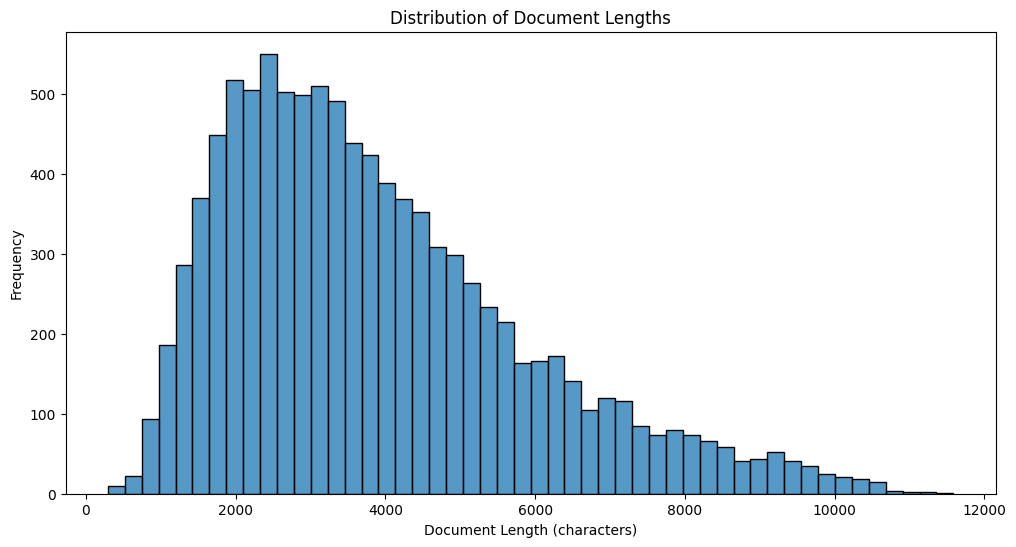

In [35]:
plt.figure(figsize=(12, 6))
sns.histplot(df['document_length'], bins=50)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [36]:
# length of summaries
df['summary_length'] = df['summary'].apply(len)

min_summary_length = df['summary_length'].min()
max_summary_length = df['summary_length'].max()
mean_summary_length = df['summary_length'].mean()
std_summary_length = df['summary_length'].std()

print(f"Descriptive statistics for 'summary' length:")
print(f"  Min length: {min_summary_length}")
print(f"  Max length: {max_summary_length}")
print(f"  Mean length: {mean_summary_length:.2f}")
print(f"  Standard deviation: {std_summary_length:.2f}")

Descriptive statistics for 'summary' length:
  Min length: 51
  Max length: 2880
  Mean length: 367.22
  Standard deviation: 157.20


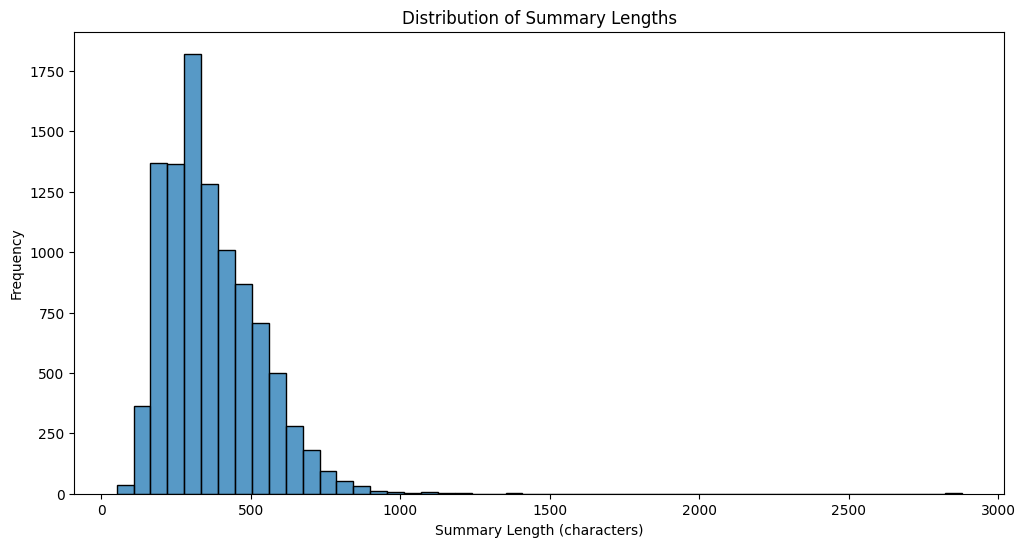

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(df['summary_length'], bins=50)
plt.title('Distribution of Summary Lengths')
plt.xlabel('Summary Length (characters)')
plt.ylabel('Frequency')
plt.show()

In [47]:
# investigate long summaries to ensure proper formatting
pd.set_option('display.max_colwidth', None)
print("Longest summaries:")
print(df.nlargest(3, 'summary_length')[['summary', 'summary_length']])
pd.reset_option('display.max_colwidth') # Reset to default after displaying

Longest summaries:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

The entries seem legitimate and no issues such as formatting noise. There's no need to remove those entries.

## Prepare Data and Export

In [48]:
# map labels to binary
df['label_binary'] = df['hallucination'].map({'yes': 1, 'no': 0})
print(df['label_binary'].value_counts(dropna=False))

label_binary
1    5010
0    4990
Name: count, dtype: int64


In [49]:
df.to_csv('halueval_summarization_processed.csv', index=False)
print("Dataset saved to 'halueval_summarization_processed.csv'")

Dataset saved to 'halueval_summarization_processed.csv'
